In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import os # accessing directory structure


In [2]:
#NLP processing imports
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
import spacy

###Vader Sentiment
#To install vaderSentiment
!pip install vaderSentiment 
from vaderSentiment import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

####Lemmatization
from nltk.stem import WordNetLemmatizer
# Lemmatize with POS Tag
from nltk.corpus import wordnet

In [3]:
data = pd.read_csv("twcs.csv")

In [4]:
 data.shape

(2811774, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
tweet_id                   int64
author_id                  object
inbound                    bool
created_at                 object
text                       object
response_tweet_id          object
in_response_to_tweet_id    float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [6]:
data.isna().count()

tweet_id                   2811774
author_id                  2811774
inbound                    2811774
created_at                 2811774
text                       2811774
response_tweet_id          2811774
in_response_to_tweet_id    2811774
dtype: int64

In [7]:
data.describe

<bound method NDFrame.describe of          tweet_id       author_id  inbound                      created_at  \
0               1      sprintcare    False  Tue Oct 31 22:10:47 +0000 2017   
1               2          115712     True  Tue Oct 31 22:11:45 +0000 2017   
2               3          115712     True  Tue Oct 31 22:08:27 +0000 2017   
3               4      sprintcare    False  Tue Oct 31 21:54:49 +0000 2017   
4               5          115712     True  Tue Oct 31 21:49:35 +0000 2017   
5               6      sprintcare    False  Tue Oct 31 21:46:24 +0000 2017   
6               8          115712     True  Tue Oct 31 21:45:10 +0000 2017   
7              11      sprintcare    False  Tue Oct 31 22:10:35 +0000 2017   
8              12          115713     True  Tue Oct 31 22:04:47 +0000 2017   
9              15      sprintcare    False  Tue Oct 31 20:03:31 +0000 2017   
10             16          115713     True  Tue Oct 31 20:00:43 +0000 2017   
11             17      sprintc

In [8]:
data = data.loc[:100000]

In [9]:
data.shape

(100001, 7)

In [10]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [11]:
pd.set_option('display.max_colwidth', -1)

In [12]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messages and no one is responding as usual,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [13]:
data["text"] = data["text"].astype(str)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


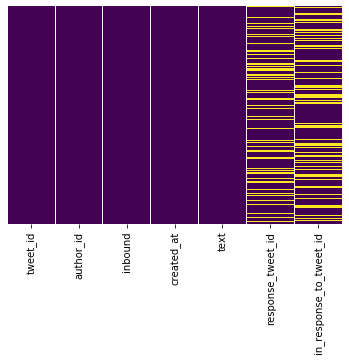

In [14]:
# To show that which columns have some Null or missing Values
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

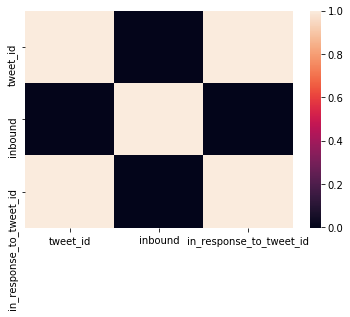

In [15]:
sns.heatmap(data.corr())

# Data Preprocessing

In [16]:
#To remove URLs 
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)

In [17]:
data["new_text"] = data["text"].apply(lambda text: remove_urls(text))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
data.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,new_text
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,2,3.0,I understand. I would like to assist you. We would need to get you into a private secured link to further assist.
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,and how do you propose we do that
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messages and no one is responding as usual,1,4.0,I have sent several private messages and no one is responding as usual
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,3,5.0,Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,I did.


In [19]:
# The top 100 words used in the data
top_N = 100
#convert list of list into text
a = data['new_text'].str.lower().str.cat(sep=' ')

In [20]:
# To remove punctuation,numbers and returns list of words
b = re.sub('[^A-Za-z]+', ' ', a)

In [21]:
# To remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

# Tokenization

In [22]:
word_tokens = word_tokenize(b) # Tokenization
filtered_sentence = [w for w in word_tokens if not w in stop_words]
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [23]:
for texts in enumerate(word_tokens[:10]):
    print(texts)

(0, 'i')
(1, 'understand')
(2, 'i')
(3, 'would')
(4, 'like')
(5, 'to')
(6, 'assist')
(7, 'you')
(8, 'we')
(9, 'would')


In [24]:
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

In [25]:
# Remove numbers from the text
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

In [26]:
text="I understand. I would like to assist you. We would need to get you into a private secured link to further assist."
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['I understand.', 'I would like to assist you.', 'We would need to get you into a private secured link to further assist.']


# Lemmatization

In [27]:
#Wordnet Lemmatizer with appropriate POS tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [28]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
# Lemmatize with POS Tag
from nltk.corpus import wordnet

In [29]:
# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

In [30]:
lemmatized_output = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in cleaned_data_title]
lemmatized_output = [word for word in lemmatized_output if not word.isnumeric()]

# import opinion lexicon

In [31]:
neg_file = open("negative-words.txt",encoding = "ISO-8859-1")
pos_file = open("positive-words.txt",encoding = "ISO-8859-1")
neg = [line.strip() for line in neg_file.readlines()]
pos = [line.strip() for line in pos_file.readlines()]
opinion_words = pos + neg
print(len(pos),len(neg),len(opinion_words))

2041 4818 6859


# Spacy Dependency Parser Approach

In [32]:
import spacy 
nlp = spacy.load("en")

In [33]:
txt ="I understand. I would like to assist you. We would need to get you into a private secured link to further assist."
doc = nlp(txt)
spacy.displacy.render(doc,style='dep',jupyter=True)

# Frequency distribution

In [34]:
word_dist = nltk.FreqDist(lemmatized_output)
top100_words = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

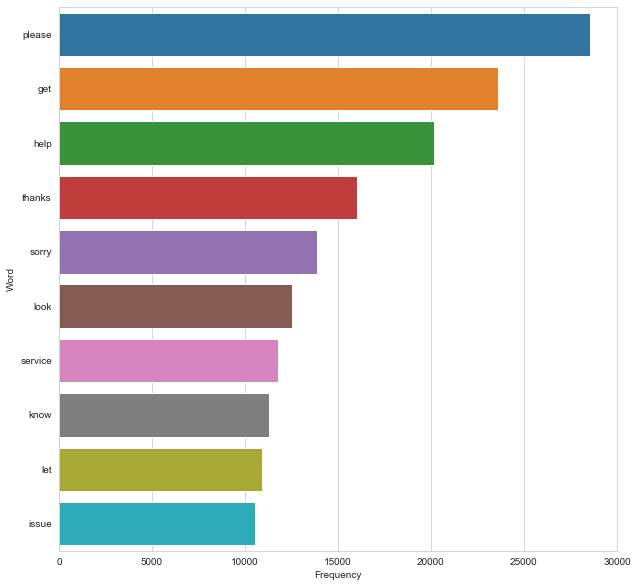

In [35]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words.head(10))

# WordCloud

In [36]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (80,80))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

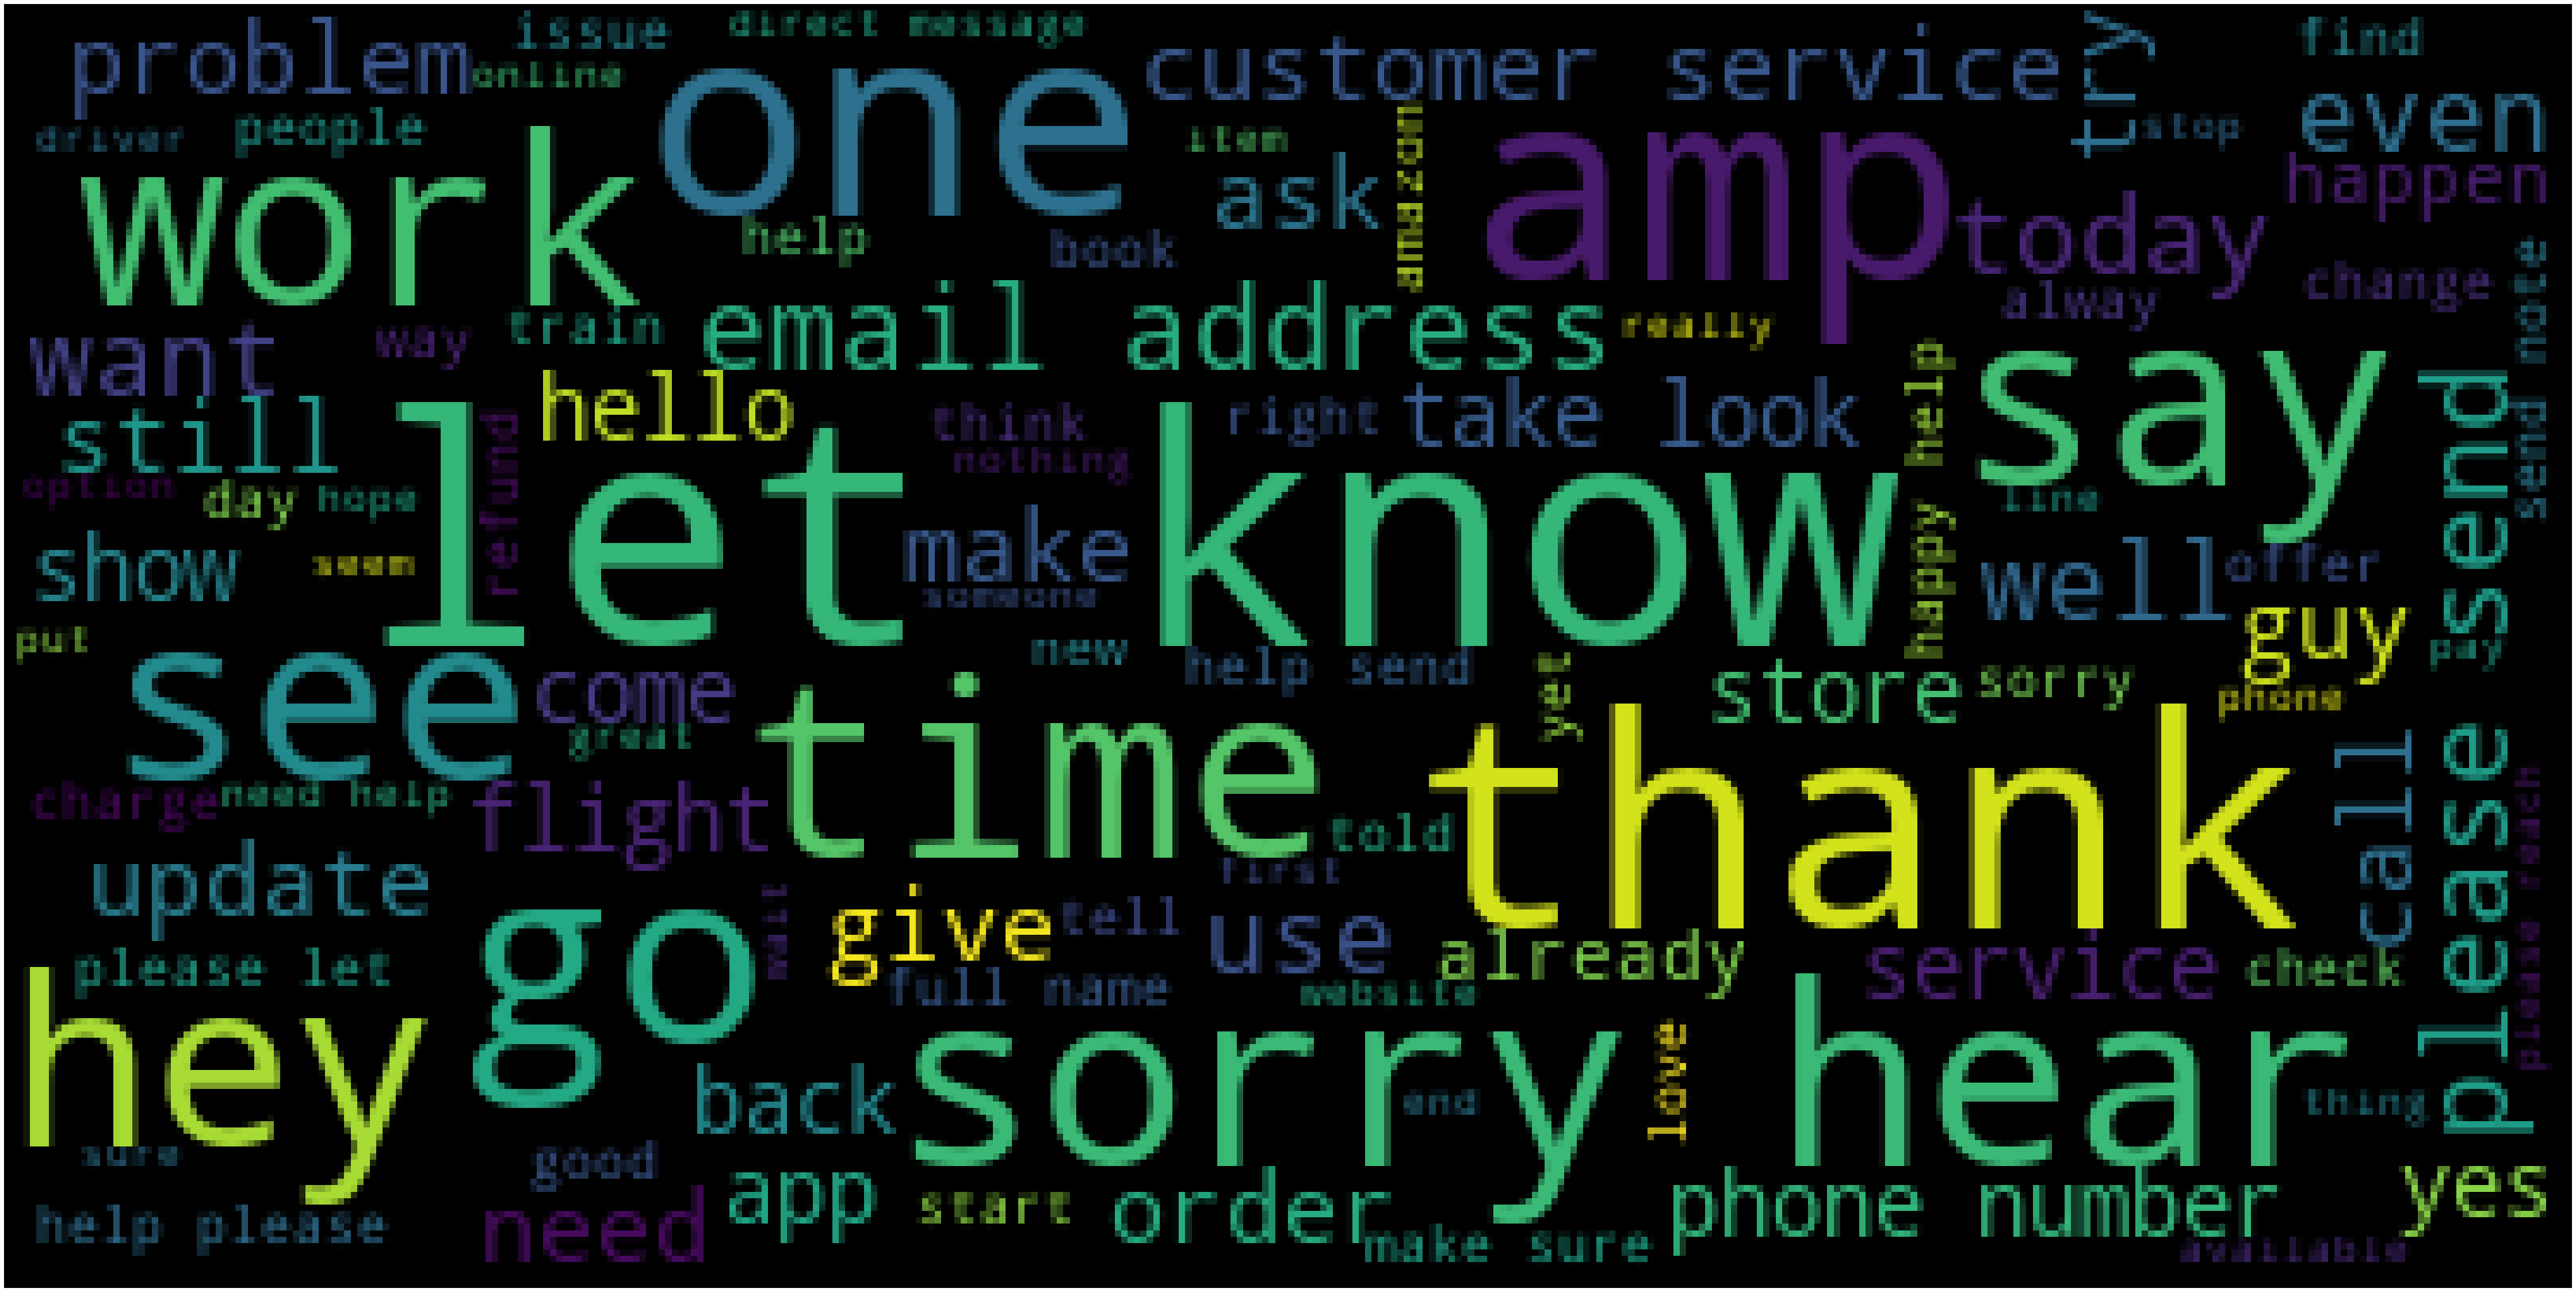

In [37]:
wc(lemmatized_output,'black','Common Words' )

# VADER Sentiment Analysis

In [38]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [39]:
data["Polarity"] = data["new_text"].apply(sentiment)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,new_text,Polarity
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,2,3.0,I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,0.6369
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,and how do you propose we do that,0.0000
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messages and no one is responding as usual,1,4.0,I have sent several private messages and no one is responding as usual,-0.2960
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,3,5.0,Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,0.4767
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,I did.,0.0000
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,"@115712 Can you please send us a private message, so that I can gain further details about your account?","5,7",8.0,"Can you please send us a private message, so that I can gain further details about your account?",0.6908
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,is the worst customer service,-0.6249
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,"@115713 This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC",NaN,12.0,"This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC",-0.5106
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your connectivity for me and my whole family ? 🤥 💯,"11,13,14",15.0,You gonna magically change your connectivity for me and my whole family ? 🤥 💯,-0.5267
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,"@115713 We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",12,16.0,"We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",0.5859


In [41]:
def senti(data):
    if data['Polarity'] >= 0.05:
        val = "Positive"
    elif data['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [42]:
data['Sentiment'] = data.apply(senti, axis=1)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,new_text,Polarity,Sentiment
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,2,3.0,I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,0.6369,Positive
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,and how do you propose we do that,0.0000,Neutral
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messages and no one is responding as usual,1,4.0,I have sent several private messages and no one is responding as usual,-0.2960,Negative
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,3,5.0,Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,0.4767,Positive
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,I did.,0.0000,Neutral
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,"@115712 Can you please send us a private message, so that I can gain further details about your account?","5,7",8.0,"Can you please send us a private message, so that I can gain further details about your account?",0.6908,Positive
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,is the worst customer service,-0.6249,Negative
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,"@115713 This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC",NaN,12.0,"This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC",-0.5106,Negative
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your connectivity for me and my whole family ? 🤥 💯,"11,13,14",15.0,You gonna magically change your connectivity for me and my whole family ? 🤥 💯,-0.5267,Negative
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,"@115713 We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",12,16.0,"We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",0.5859,Positive


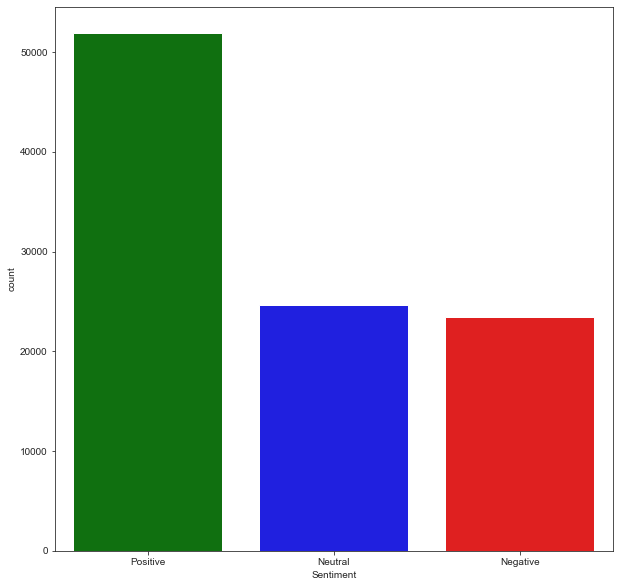

In [44]:
plt.figure(figsize=(10,10))
sns.set_style("ticks")
ax = sns.countplot(x="Sentiment", data=data, 
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))

# Aspect Mining

In [45]:
def pos(text):
    doc = nlp(text)
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [46]:
data["Aspects"] = data["new_text"].apply(pos)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
data.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,new_text,Polarity,Sentiment,Aspects
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,2,3.0,I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,0.6369,Positive,[link]
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0,and how do you propose we do that,0.0000,Neutral,[]
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messages and no one is responding as usual,1,4.0,I have sent several private messages and no one is responding as usual,-0.2960,Negative,"[messages, one]"
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,3,5.0,Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,0.4767,Positive,"[Message, Message, ’, top, profile]"
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0,I did.,0.0000,Neutral,[]
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,"@115712 Can you please send us a private message, so that I can gain further details about your account?","5,7",8.0,"Can you please send us a private message, so that I can gain further details about your account?",0.6908,Positive,"[message, details, account]"
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,is the worst customer service,-0.6249,Negative,"[customer, service]"
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,"@115713 This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC",NaN,12.0,"This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC",-0.5106,Negative,[DM]
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your connectivity for me and my whole family ? 🤥 💯,"11,13,14",15.0,You gonna magically change your connectivity for me and my whole family ? 🤥 💯,-0.5267,Negative,"[connectivity, family, 🤥]"
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,"@115713 We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",12,16.0,"We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",0.5859,Positive,"[concerns, Message]"


In [48]:
#removing neutral data
filtered_data= data[data.Sentiment != "Neutral"].reset_index()
filtered_data

,index,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,new_text,Polarity,Sentiment,Aspects
0,0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,2,3.0,I understand. I would like to assist you. We would need to get you into a private secured link to further assist.,0.6369,Positive,[link]
1,2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messages and no one is responding as usual,1,4.0,I have sent several private messages and no one is responding as usual,-0.2960,Negative,"[messages, one]"
2,3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,3,5.0,Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.,0.4767,Positive,"[Message, Message, ’, top, profile]"
3,5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,"@115712 Can you please send us a private message, so that I can gain further details about your account?","5,7",8.0,"Can you please send us a private message, so that I can gain further details about your account?",0.6908,Positive,"[message, details, account]"
4,6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,is the worst customer service,-0.6249,Negative,"[customer, service]"
5,7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,"@115713 This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC",NaN,12.0,"This is saddening to hear. Please shoot us a DM, so that we can look into this for you. -KC",-0.5106,Negative,[DM]
6,8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your connectivity for me and my whole family ? 🤥 💯,"11,13,14",15.0,You gonna magically change your connectivity for me and my whole family ? 🤥 💯,-0.5267,Negative,"[connectivity, family, 🤥]"
7,9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,"@115713 We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",12,16.0,"We understand your concerns and we'd like for you to please send us a Direct Message, so that we can further assist you. -AA",0.5859,Positive,"[concerns, Message]"
8,11,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,"@115713 H there! We'd definitely like to work with you on this, how long have you been experiencing this issue? -AA",16,18.0,"H there! We'd definitely like to work with you on this, how long have you been experiencing this issue? -AA",0.6696,Positive,[issue]
9,12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,"@115714 y’all lie about your “great” connection. 5 bars LTE, still won’t load something. Smh.",17,NaN,"y’all lie about your “great” connection. 5 bars LTE, still won’t load something. Smh.",-0.3182,Negative,"[connection, bars, something, Smh]"


In [49]:
print(filtered_data.shape)
filtered_data['Sentiment'].value_counts()

(75367, 12)


Positive    51896
Negative    23471
Name: Sentiment, dtype: int64

In [50]:
#dividing the data into train dataset and test dataset
from sklearn.model_selection import train_test_split
Y=filtered_data['Sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(filtered_data, Y, test_size=0.2)

In [51]:
X_train=X_train.reset_index()
X_train

,level_0,index,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,new_text,Polarity,Sentiment,Aspects
0,23388,31866,40609,Tesco,False,Wed Nov 01 15:24:01 +0000 2017,"@124914 Hey Leanna, sorry for the inconvenience I have contacted the DM and they will have a look into this. TY - Rian",NaN,40610.0,"Hey Leanna, sorry for the inconvenience I have contacted the DM and they will have a look into this. TY - Rian",0.2769,Positive,"[inconvenience, look, TY]"
1,71699,95080,120845,XboxSupport,False,Thu Nov 23 20:19:10 +0000 2017,"@142879 Sorry to hear! So we can take a closer look with you, can you DM us your gamertag please? https://t.co/nPX1yNXCi5 ^QZ",120844,NaN,"Sorry to hear! So we can take a closer look with you, can you DM us your gamertag please? ^QZ",0.3164,Positive,"[look, gamertag]"
2,23409,31892,40647,124924,True,Wed Nov 01 15:11:50 +0000 2017,Why is speed gang still not on Spotify 😒 get your shit together @115888,40646,NaN,Why is speed gang still not on Spotify 😒 get your shit together,-0.5574,Negative,"[speed, gang, shit]"
3,9883,13388,17606,119896,True,Wed Nov 01 04:28:52 +0000 2017,@119897 @115714 y’all got shitty service,17605,17607.0,y’all got shitty service,-0.5574,Negative,[service]
4,26062,35559,45308,126014,True,Mon Oct 30 19:13:17 +0000 2017,@126015 why so little interest in resolving my problems with a fraudster using THREE different accounts. 25 minutes and unresolved!,45307,NaN,why so little interest in resolving my problems with a fraudster using THREE different accounts. 25 minutes and unresolved!,-0.2893,Negative,"[interest, problems, fraudster, accounts, minutes]"
5,17429,23777,30295,marksandspencer,False,Wed Nov 01 11:29:38 +0000 2017,"@122659 We apologise, this is a mistake on our website and is currently being updated.",NaN,30296.0,"We apologise, this is a mistake on our website and is currently being updated.",0.0516,Positive,"[mistake, website]"
6,50784,68136,87135,AppleSupport,False,Fri Dec 01 03:38:00 +0000 2017,"@135065 If you're using iCloud Photo Library on your iPhone, sometimes your Wi-Fi connection can interfere with the communication with iCloud. This is why restarting your iPhone will sometimes help. We're glad to hear your photos are back. DM us with any other questions. https://t.co/GDrqU22YpT",87136,87133.0,"If you're using iCloud Photo Library on your iPhone, sometimes your Wi-Fi connection can interfere with the communication with iCloud. This is why restarting your iPhone will sometimes help. We're glad to hear your photos are back. DM us with any other questions.",0.6908,Positive,"[connection, communication, photos, questions]"
7,40181,54412,67260,AskeBay,False,Thu Nov 30 08:55:56 +0000 2017,"@131350 (2/2) setup to receive them. If you have any suggestions for change, please submit them: https://t.co/wDQ4LPNZ2l Thanks ^AH",NaN,67261.0,"(2/2) setup to receive them. If you have any suggestions for change, please submit them: Thanks ^AH",0.6369,Positive,"[setup, suggestions, change, Thanks]"
8,56319,75188,96827,AmazonHelp,False,Thu Nov 30 16:44:36 +0000 2017,"@137134 Hi Warren. Disabling notifications on the device, as you've done, would be the only way to stop them. If you'd like to leave us some feedback, you can do so here: https://t.co/U50V2WuRgF ^TI",NaN,96825.0,"Hi Warren. Disabling notifications on the device, as you've done, would be the only way to stop them. If you'd like to leave us some feedback, you can do so here: ^TI",-0.4588,Negative,"[notifications, device, way, feedback]"
9,265,378,672,115844,True,Tue Oct 31 20:59:45 +0000 2017,"I'm NEVER using Amazon again! After waiting in all day as item is ""out for delivery"", they've only gone and sent it to the WRONG COUNTRY!","671,673,674",NaN,"I'm NEVER using Amazon again! After waiting in all day as item is ""out for delivery"", they've only gone and sent it to the WRONG COUNTRY!",-0.7127,Negative,"[day, item, delivery, COUNTRY]"


In [52]:
X_test=X_test.reset_index()
X_test

,level_0,index,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,new_text,Polarity,Sentiment,Aspects
0,17431,23779,30297,marksandspencer,False,Thu Sep 07 08:01:31 +0000 2017,"Today, we're celebrating 50 years in Northern Ireland! We’re proud to have been great friends through the years. Here’s to 50 more! 🥂🎉 https://t.co/sVwhtk9fcI","30296,30298,30299,30300,30301,30302,30303,30304,30305,30306,30307,30308,30309,30310,30311,30312",NaN,"Today, we're celebrating 50 years in Northern Ireland! We’re proud to have been great friends through the years. Here’s to 50 more! 🥂🎉",0.9555,Positive,"[Today, years, friends, years]"
1,31948,43504,54324,asksalesforce,False,Wed Nov 01 16:56:56 +0000 2017,"@128294 Hi Katy, this may be helpful https://t.co/DRCNdLRlAD ^RG",NaN,54325.0,"Hi Katy, this may be helpful ^RG",0.4215,Positive,[]
2,49138,66020,83860,134430,True,Fri Dec 01 08:18:04 +0000 2017,"@O2 @134429 OnePlus3T. Of course the @O2 live chat ""help"" got it wrong yet again - told me that if my phone wasn't ready for WiFi calling by the time TuGo is retired they would continue the service. Now I have no phone service at all. Goodbye @O2 as soon as I get the chance.",83866,83858.0,"OnePlus3T. Of course the live chat ""help"" got it wrong yet again - told me that if my phone wasn't ready for WiFi calling by the time TuGo is retired they would continue the service. Now I have no phone service at all. Goodbye as soon as I get the chance.",-0.4039,Negative,"[live, help, phone, time, service, phone, service, chance]"
3,18547,25313,31990,Uber_Support,False,Wed Nov 01 12:38:25 +0000 2017,@123081 Here to help! Send us a note via https://t.co/WFtPA6RjWt to assist you further.,NaN,31991.0,Here to help! Send us a note via to assist you further.,0.4574,Positive,[note]
4,17272,23575,30056,122610,True,Wed Nov 22 17:22:12 +0000 2017,@sprintcare ...the northeast United States of America.,30058,30055.0,...the northeast United States of America.,0.4215,Positive,[]
5,10337,13986,18266,120054,True,Wed Nov 01 08:31:55 +0000 2017,"@British_Airways And @2042... I refuse to air my laundry in public, but if you knew WHY I was flying you'd get it. But that should not be the point",NaN,18260.0,"And I refuse to air my laundry in public, but if you knew WHY I was flying you'd get it. But that should not be the point",-0.1531,Negative,"[laundry, public, point]"
6,64770,85993,109571,AirAsiaSupport,False,Sat Nov 25 09:54:46 +0000 2017,@140322 We appreciate your patience and understanding regarding this. You shall be notify accordingly once they receive your bag.-Ma,NaN,109570.0,We appreciate your patience and understanding regarding this. You shall be notify accordingly once they receive your bag.-Ma,0.4019,Positive,"[patience, understanding, bag.-Ma]"
7,17608,24014,30566,Uber_Support,False,Wed Nov 01 17:06:34 +0000 2017,"@122726 Sorry for the delay, Sam. Our team is looking into this further and will be following up with you shortly!",NaN,30565.0,"Sorry for the delay, Sam. Our team is looking into this further and will be following up with you shortly!",-0.4389,Negative,"[delay, team]"
8,19734,26959,34683,AppleSupport,False,Wed Nov 01 13:17:01 +0000 2017,"@123521 We want to look into what's going on with your TouchID. To start, which device and iOS version are you using?",34684,34685.0,"We want to look into what's going on with your TouchID. To start, which device and iOS version are you using?",0.0772,Positive,"[TouchID, device, version]"
9,43709,59039,74177,132602,True,Wed Nov 29 17:55:00 +0000 2017,"@sainsburys popped into the new express shop in forgate st Worcester, aunt got this ain't got that everything I asked her she didn't have 😡 very rude , rushed service, won't be going there again ever 😡😡",74176,NaN,"popped into the new express shop in forgate st Worcester, aunt got this ain't got that everything I asked her she didn't have 😡 very rude , rushed service, won't be going there again ever 😡😡",-0.5095,Negative,"[shop, forgate, aun

In [53]:
#checking for null values
X_train.isnull().any()

level_0                    False
index                      False
tweet_id                   False
author_id                  False
inbound                    False
created_at                 False
text                       False
response_tweet_id          True 
in_response_to_tweet_id    True 
new_text                   False
Polarity                   False
Sentiment                  False
Aspects                    False
dtype: bool

In [54]:
X_test.isnull().any()

level_0                    False
index                      False
tweet_id                   False
author_id                  False
inbound                    False
created_at                 False
text                       False
response_tweet_id          True 
in_response_to_tweet_id    True 
new_text                   False
Polarity                   False
Sentiment                  False
Aspects                    False
dtype: bool

In [55]:
train_corpus = []

for i in range(0, 60293):
  review = re.sub('[^a-zA-Z]', ' ', X_train['new_text'][i])
  review = review.lower()
  review = review.split()
  
  #ps = PorterStemmer()
  sno = nltk.stem.SnowballStemmer('english')
  
  # stemming
  review = [sno.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [56]:
test_corpus = []

for i in range(0, 15074):
  review = re.sub('[^a-zA-Z]', ' ', X_test['new_text'][i])
  review = review.lower()
  review = review.split()
  
  #ps = PorterStemmer()
  sno = nltk.stem.SnowballStemmer('english')
  
  # stemming
  review = [sno.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
N = 1000

In [58]:
# create tf_idf from train_corpus
cv = CountVectorizer(max_features=N)
wordcount_train = cv.fit_transform(train_corpus)

tfidf_tr=TfidfTransformer(smooth_idf=True,use_idf=True)

x = tfidf_tr.fit_transform(wordcount_train).toarray()
features = cv.get_feature_names()
y = X_train['Polarity']

print(x.shape)
print(y.shape)

(60293, 1000)
(60293,)


In [59]:
# create tf_idf from test_corpus
cv = CountVectorizer(max_features=N)
wordcount_test = cv.fit_transform(test_corpus)

tfidf_tr=TfidfTransformer(smooth_idf=True,use_idf=True)

x_test = tfidf_tr.fit_transform(wordcount_test).toarray()
features = cv.get_feature_names()

print(x_test.shape)

(15074, 1000)


In [73]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(45219, 1000)
(15074, 1000)
(45219,)
(15074,)


In [61]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [62]:
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import f1_score

In [69]:
from sklearn import metrics

In [75]:
# random forest 
from sklearn.ensemble import 


model = RandomForestRegressor()
model.fit(x_train, y_train)

y_pred=model.predict(x_valid)

print("Training Accuracy :", model.score(x_train,y_train))
print("Validation Accuracy:",model.score(x_valid,y_valid))


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training Accuracy : 0.9132833416663018
Validation Accuracy: 0.5779874290067084


In [77]:
# decision tree 
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

y_pred=model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy:",model.score(x_valid,y_valid))

Training Accuracy : 0.9847182990741052
Validation Accuracy: 0.34290970158230816


In [80]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(20, 3), max_iter=200, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(x_train, y_train)
y_pred=model.predict(x_valid)


print("Training Accuracy :", mlp.score(x_train, y_train))
print("Validation Accuracy:",model.score(x_valid,y_valid))

Iteration 1, loss = 0.07208043
Iteration 2, loss = 0.04790348
Iteration 3, loss = 0.04368296
Iteration 4, loss = 0.04213420
Iteration 5, loss = 0.04116236
Iteration 6, loss = 0.04049204
Iteration 7, loss = 0.03963730
Iteration 8, loss = 0.03980328
Iteration 9, loss = 0.03895076
Iteration 10, loss = 0.03852167
Iteration 11, loss = 0.03815602
Iteration 12, loss = 0.03736651
Iteration 13, loss = 0.03715160
Iteration 14, loss = 0.03677355
Iteration 15, loss = 0.03629874
Iteration 16, loss = 0.03577891
Iteration 17, loss = 0.03534933
Iteration 18, loss = 0.03530904
Iteration 19, loss = 0.03466421
Iteration 20, loss = 0.03440397
Iteration 21, loss = 0.03386833
Iteration 22, loss = 0.03373549
Iteration 23, loss = 0.03315883
Iteration 24, loss = 0.03284576
Iteration 25, loss = 0.03267551
Iteration 26, loss = 0.03209378
Iteration 27, loss = 0.03180550
Iteration 28, loss = 0.03116761
Iteration 29, loss = 0.03102244
Iteration 30, loss = 0.03070905
Iteration 31, loss = 0.03038150
Iteration 32, los